<a href="https://colab.research.google.com/github/gowaabk/Colab_dz4/blob/main/dz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Условие 1: Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

1. Скачать следующие данные: kc-house-data и laptop_price
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки

In [ ]:
#1. Скачать следующие данные: kc-house-data и laptop_price



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_house = pd.read_csv("kc-house-data.csv")

df_house.head()
df_house['price'].max()

7700000.0

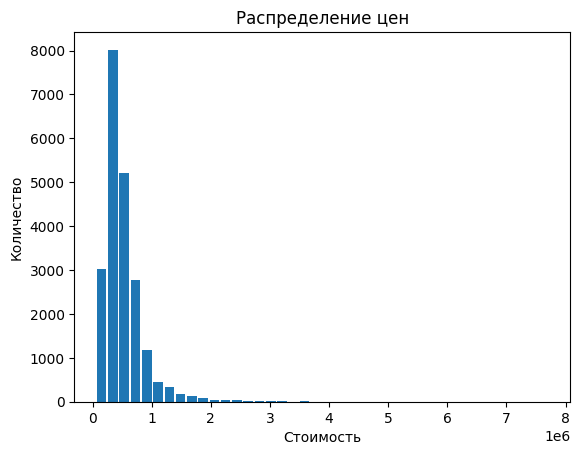

In [ ]:
# 2. Изучите стоимости недвижимости

plt.hist(df_house['price'], bins=40, width = 160000)
plt.title('Распределение цен')
plt.xlabel('Стоимость')
plt.ylabel('Количество');


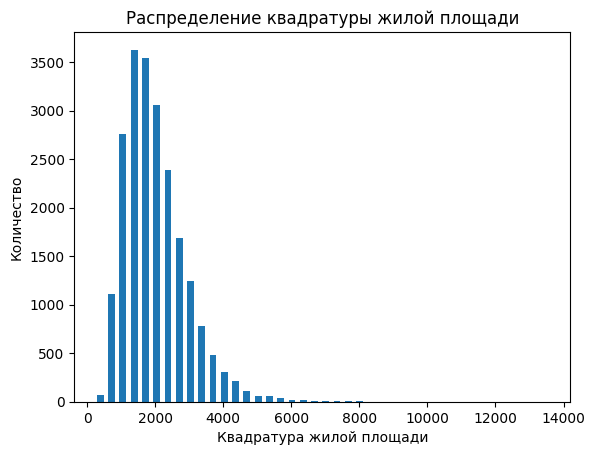

In [ ]:
#3 Изучите распределение квадратуры жилой
plt.hist(df_house['sqft_living'], bins=40, width = 200)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество');

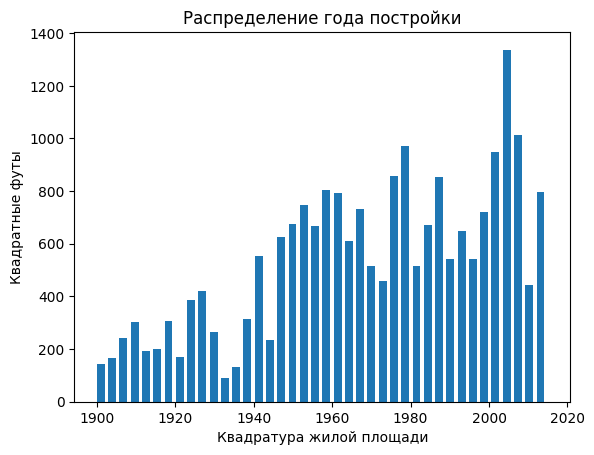

In [ ]:
#4 Изучите распределение года постройки
plt.hist(df_house['yr_built'], bins=40, width = 2)
plt.title('Распределение года постройки')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Квадратные футы');

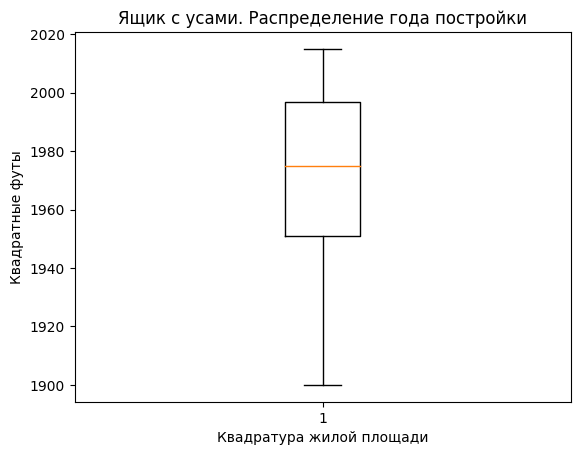

In [ ]:
plt.boxplot(df_house['yr_built'])
plt.title('Ящик с усами. Распределение года постройки')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Квадратные футы');

## Условие 2: 2 задача
1. Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы
2. Изучите распределение этажей домов
3. Изучите распределение состояния домов

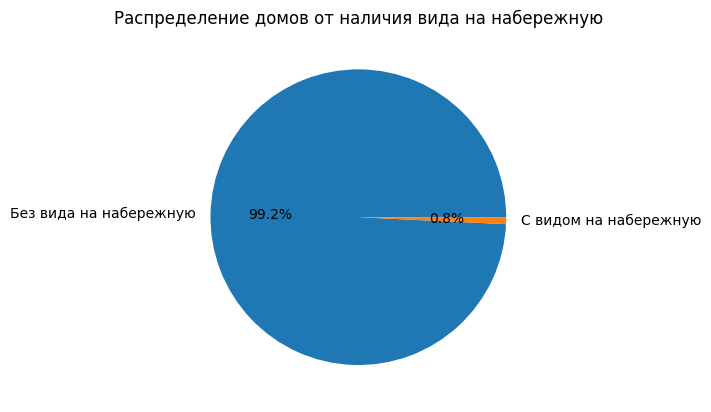

In [ ]:
#1. Изучите распределение домов от наличия вида на набережную
waterview = df_house['waterfront'].value_counts()
plt.pie(waterview.values, labels=['Без вида на набережную', 'C видом на набережную'], autopct='%.1f%%');
plt.title('Распределение домов от наличия вида на набережную');


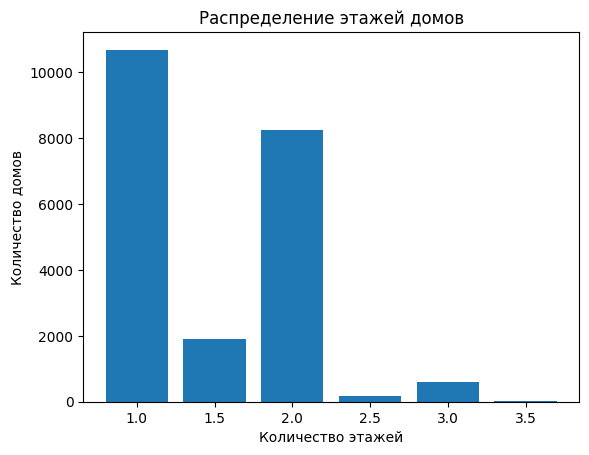

In [ ]:
#2. Изучите распределение этажей домов
data = df_house['floors'].value_counts()
plt.bar(data.index, data.values,width = 0.4)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

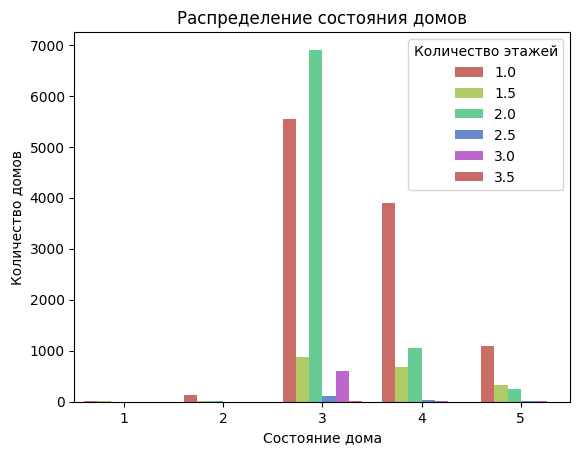

In [ ]:
# 3. Изучите распределение состояния домов
import seaborn as sns

sns.countplot(data=df_house, x='condition',hue='floors', palette = 'hls')
plt.title('Распределение состояния домов');
plt.legend(title='Количество этажей')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');


## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


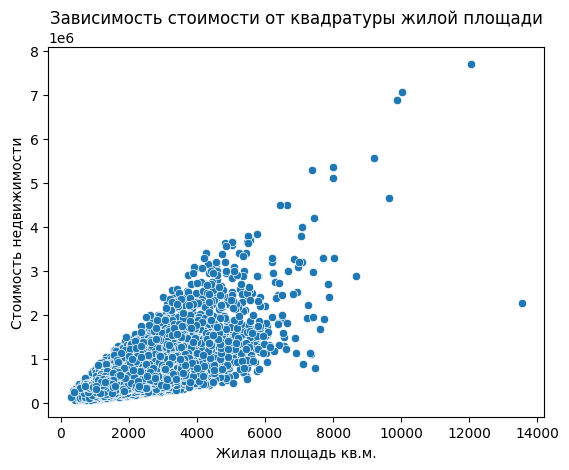

In [ ]:
sns.scatterplot(data=df_house, x='sqft_living', y='price')
plt.title('Зависимость стоимости от квадратуры жилой площади');
plt.xlabel('Жилая площадь кв.м.')
plt.ylabel('Стоимость недвижимости');

####Вывод:
Чем больше площадь дома, тем выше его стоимость.

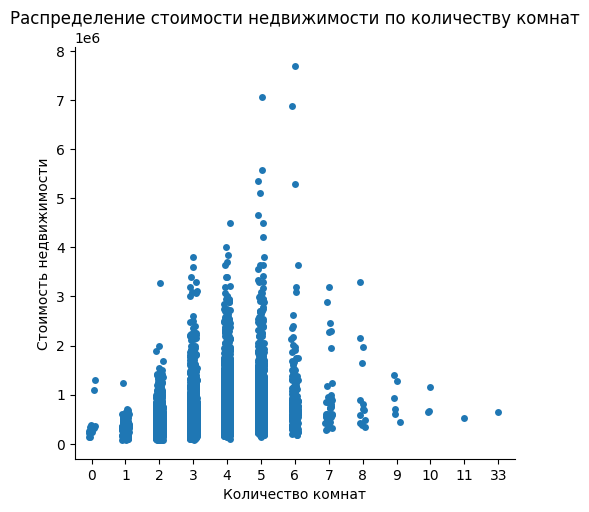

In [ ]:
#sns.boxplot(data=df_house, x='bedrooms', y='price')
sns.catplot(data=df_house, x='bedrooms', y='price')
plt.title('Распределение стоимости недвижимости по количеству комнат');
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость недвижимости');


####Вывод:
В большинстве случаев, количество комнат увеличивает стоимость дома.

Text(0, 0.5, 'Стоимость недвижимости')

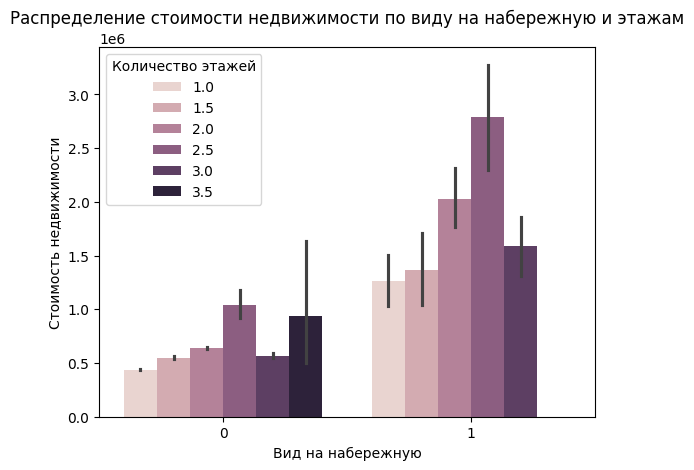

In [ ]:
sns.barplot(data=df_house, x='waterfront', y='price', hue='floors')
plt.legend(title='Количество этажей');
plt.title('Распределение стоимости недвижимости по виду на набережную и этажам')
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость недвижимости')

####Вывод:

Дома с большим количеством этажей и видом на набережную стоят дороже.

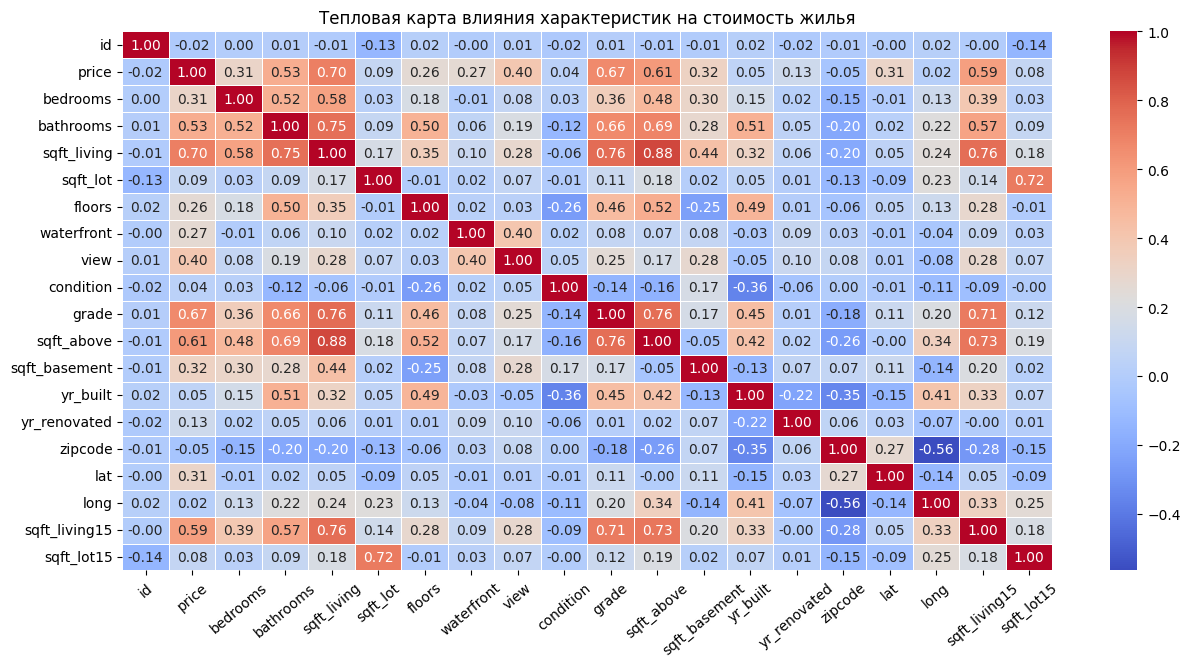

In [ ]:
# Построение тепловой карты
numeric_columns = df_house.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта влияния характеристик на стоимость жилья');
plt.xticks(rotation=40);
